In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [ ]:
from scripts.data_load import *
import matplotlib.pyplot as plt

In [3]:
data = load_data('../data/BrentOilPrices.csv')
print(data.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [9]:
# Check for missing values
print(data.isnull().sum())

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

# Ensure 'Price' is numeric
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Drop rows with missing values (if any)
data = data.dropna()

# Display cleaned data
print(data.head())

Date     0
Price    0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_10524\711197603.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10524\711197603.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


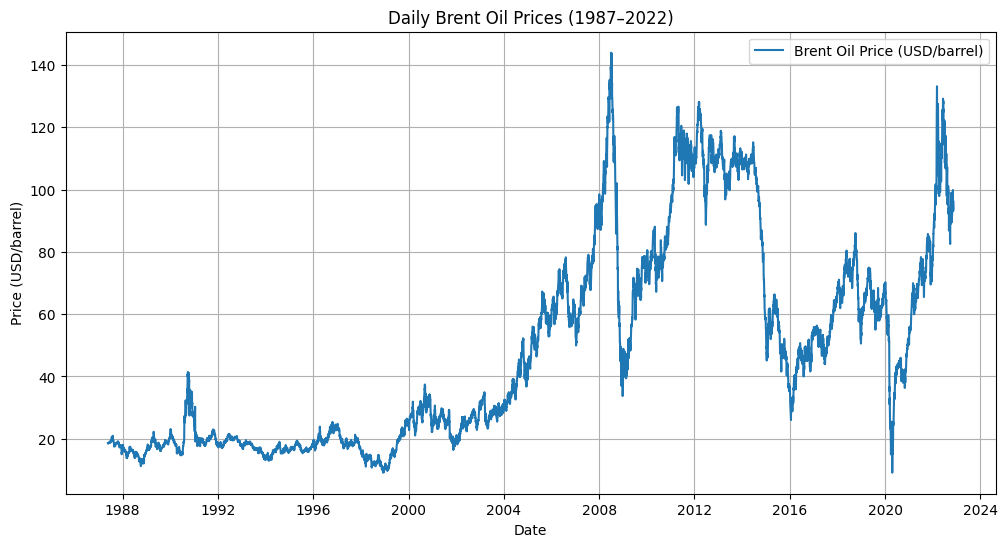

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price (USD/barrel)')
plt.title('Daily Brent Oil Prices (1987–2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Descriptive statistics
print(data['Price'].describe())

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


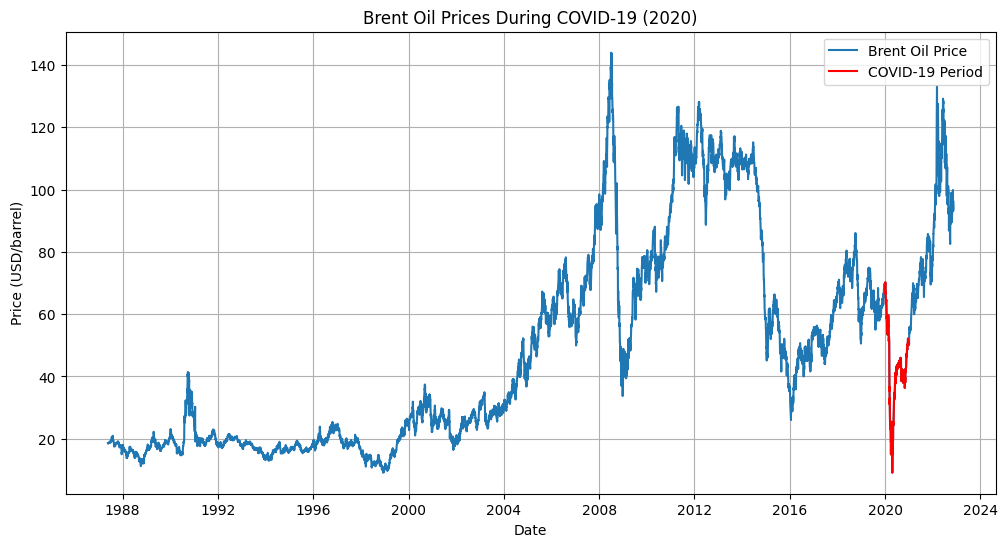

In [12]:
# Highlight COVID-19 period (2020)
covid_period = data[(data['Date'] >= '2020-01-01') & (data['Date'] <= '2020-12-31')]

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
plt.plot(covid_period['Date'], covid_period['Price'], color='red', label='COVID-19 Period')
plt.title('Brent Oil Prices During COVID-19 (2020)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid()
plt.show()

In [13]:
# Example: Calculate percentage change during COVID-19
pre_covid_price = data[data['Date'] == '2019-12-31']['Price'].values[0]
post_covid_price = data[data['Date'] == '2020-04-01']['Price'].values[0]
percentage_change = ((post_covid_price - pre_covid_price) / pre_covid_price) * 100

print(f"Percentage change in Brent oil prices during COVID-19: {percentage_change:.2f}%")

Percentage change in Brent oil prices during COVID-19: -77.91%


In [16]:
data.to_csv('../data/cleaned_brent_oil_prices.csv')